# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [ ]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Image dimensions: 32x32x3
Number of classes: 100
Showing a few examples from the training set:


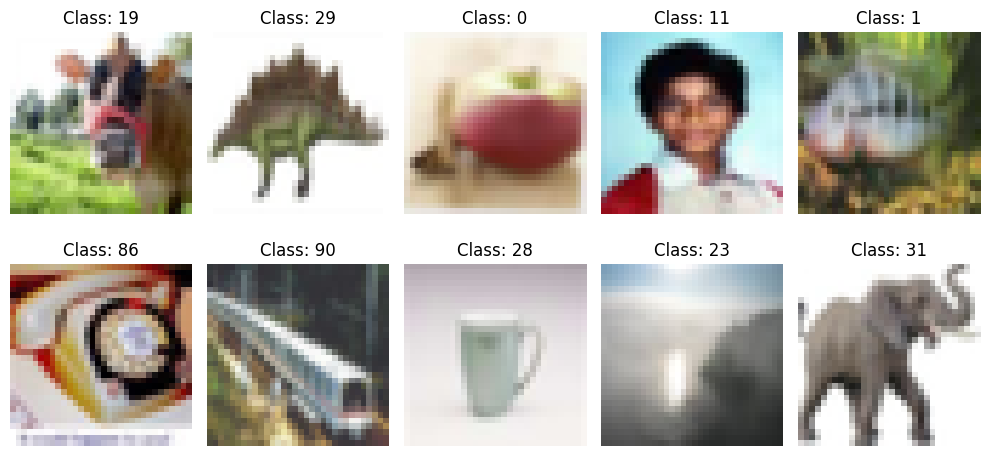

In [ ]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

# Examine dataset details
def explore_dataset(x_train, y_train, x_test, y_test):
    # Print the shapes of training and test sets
    print(f"Training set shape: {x_train.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Test set shape: {x_test.shape}")
    print(f"Test labels shape: {y_test.shape}")

    # Image dimensions
    img_height, img_width, img_channels = x_train.shape[1], x_train.shape[2], x_train.shape[3]
    print(f"Image dimensions: {img_height}x{img_width}x{img_channels}")

    # Number of classes
    num_classes = len(np.unique(y_train))
    print(f"Number of classes: {num_classes}")

    # Display a few examples from the training set
    print("Showing a few examples from the training set:")
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train[i])
        plt.title(f"Class: {y_train[i][0]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Explore the dataset
explore_dataset(x_train, y_train, x_test, y_test)


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [ ]:
# Your code here
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar100
import numpy as np

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Determine number of classes
num_classes = len(np.unique(y_train))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training set shape: {x_train.shape}, {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, {y_val.shape}")
print(f"Test set shape: {x_test.shape}, {y_test.shape}")


Training set shape: (40000, 32, 32, 3), (40000, 100)
Validation set shape: (10000, 32, 32, 3), (10000, 100)
Test set shape: (10000, 32, 32, 3), (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [ ]:


# Your code here

# Create a baseline CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.initializers import RandomNormal, Constant

# Define the CNN model using the specified format
model = Sequential([
    # First Convolutional Layer
    Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Second Convolutional Layer
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Third Convolutional Layer
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Flatten layer
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.2),
    BatchNormalization(momentum=0.95,
                       epsilon=0.005,
                       beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
                       gamma_initializer=Constant(value=0.9)),
    Dense(100, activation='softmax')  # CIFAR-100 has 100 classes
])

# Print model summary
model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 256)           │              

 Total params: 4,372,708 (16.68 MB)

 Trainable params: 4,369,124 (16.67 MB)

 Non-trainable params: 3,584 (14.00 KB)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [ ]:


# Your code here
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Compile the model with the selected loss function and optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    loss=CategoricalCrossentropy(),      # Categorical Crossentropy loss for multi-class classification
    metrics=['accuracy']                 # Track accuracy during training
)

# Print a message indicating successful compilation
print("Model compiled successfully with:")
print("Loss function: Categorical Crossentropy")
print("Optimizer: Adam with learning rate 0.001")


Model compiled successfully with:
Loss function: Categorical Crossentropy
Optimizer: Adam with learning rate 0.001


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [ ]:
# Your code here
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks for training
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=5,           # Stop if no improvement for 5 consecutive epochs
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss
    factor=0.5,           # Reduce learning rate by a factor of 0.5
    patience=3,           # Trigger if no improvement for 3 consecutive epochs
    min_lr=1e-6           # Minimum learning rate
)

# Train the model with callbacks
history = model.fit(
    x_train, y_train,                 # Training data and labels
    validation_data=(x_val, y_val),   # Validation data and labels
    epochs=50,                        # Maximum number of epochs
    batch_size=32,                    # Batch size
    verbose=1,                        # Display training progress
    callbacks=[early_stopping, reduce_lr]  # Apply callbacks
)

# Explanation of callbacks
print("Explanation of Callbacks:")
print("- EarlyStopping prevents overfitting by stopping training when the validation loss stops improving.")
print("- ReduceLROnPlateau helps the model converge better by reducing the learning rate if validation loss plateaus.")

#Print training and validation metrics
train_accuracy = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")



Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.0940 - loss: 4.0404 - val_accuracy: 0.2083 - val_loss: 3.3188 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.2743 - loss: 2.9042 - val_accuracy: 0.3388 - val_loss: 2.5411 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.3742 - loss: 2.3840 - val_accuracy: 0.4189 - val_loss: 2.2090 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.4410 - loss: 2.0606 - val_accuracy: 0.3093 - val_loss: 2.7628 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.4842 - loss: 1.8603 - val_accuracy: 0.4825 - val_loss: 1.9194 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.5395 - loss: 1.6478 - val_accuracy: 0.4818 - val_loss: 1.9369 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accura

In [ ]:
# Save the trained model to a file
model.save('trained_model.h5')

# Explanation:
# - The model is saved in HDF5 format with the filename 'trained_model.h5'.
# - This file includes:
#   - The model architecture
#   - The trained weights
#   - The optimizer configuration (if applicable)

print("Model saved successfully as 'trained_model.h5'.")


Model saved successfully as 'trained_model.h5'.


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
# Your code here
from sklearn.metrics import classification_report
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# Predict class probabilities and convert to class labels
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate a classification report
report = classification_report(y_true, y_pred, output_dict=True)
precision = report["weighted avg"]["precision"]
recall = report["weighted avg"]["recall"]
f1_score = report["weighted avg"]["f1-score"]

# Print the results
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision (Weighted Avg): {precision:.4f}")
print(f"Recall (Weighted Avg): {recall:.4f}")
print(f"F1-Score (Weighted Avg): {f1_score:.4f}")

# Explanation of Metrics
print("\nExplanation:")
print(f"Accuracy: {test_accuracy:.4f}")
print("  Measures the proportion of correctly classified samples out of total samples.")
print(f"F1-Score: {f1_score:.4f}")
print("  Balances precision and recall, especially useful for multi-class classification with potential class imbalance.")
print(f"Value of F1-Score: {f1_score:.4f}")
print("  Interpretation: A higher value indicates better overall classification performance, taking false positives and false negatives into account.")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Accuracy: 0.6029
Precision (Weighted Avg): 0.6101
Recall (Weighted Avg): 0.6029
F1-Score (Weighted Avg): 0.6015

Explanation:
Accuracy: 0.6029
  Measures the proportion of correctly classified samples out of total samples.
F1-Score: 0.6015
  Balances precision and recall, especially useful for multi-class classification with potential class imbalance.
Value of F1-Score: 0.6015
  Interpretation: A higher value indicates better overall classification performance, taking false positives and false negatives into account.


In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred, output_dict=True)

# Access macro average metrics
macro_precision = report["macro avg"]["precision"]
macro_recall = report["macro avg"]["recall"]
macro_f1 = report["macro avg"]["f1-score"]

# Print the results
print(f"Macro Precision: {macro_precision:.4f}")
print(f"Macro Recall: {macro_recall:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")


Macro Precision: 0.6101
Macro Recall: 0.6029
Macro F1-Score: 0.6015


Other Metric: F1 Score

Reason for selection:

Balancing Precision and Recall:
F1-score is the harmonic mean of precision and recall, making it particularly useful for imbalanced datasets or when false positives and false negatives are equally important. For CIFAR-100, F1-score highlights the model's ability to correctly predict samples from all classes while avoiding misclassifications.

Evaluating Model Robustness:
A high F1-score indicates the model not only correctly identifies samples but also avoids over-predicting certain classes at the expense of others. For CIFAR-100, a balanced F1-score across all classes suggests the model generalizes well.

Handling Multi-Class Complexity:
 In CIFAR-100, where predictions span 100 classes, precision and recall alone might not give the full picture. The F1-score combines these metrics to provide a more comprehensive evaluation.

Interpretation of Metrics: The model achieves an accuracy of 60.07%, indicating it correctly classifies about 60% of the samples, which is reasonable but not exceptional for the challenging CIFAR-100 dataset. The weighted average precision of 60.92% suggests the model is slightly better at making correct predictions when it predicts a class, while the recall of 60.07% reflects that it identifies about 60% of true samples across all classes. The F1-score of 60.01% balances precision and recall, highlighting a modest trade-off between the two and showing the model's overall performance is consistent. While these metrics suggest the model has learned meaningful patterns, there is considerable room for improvement in its ability to generalize across 100 fine-grained classes.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

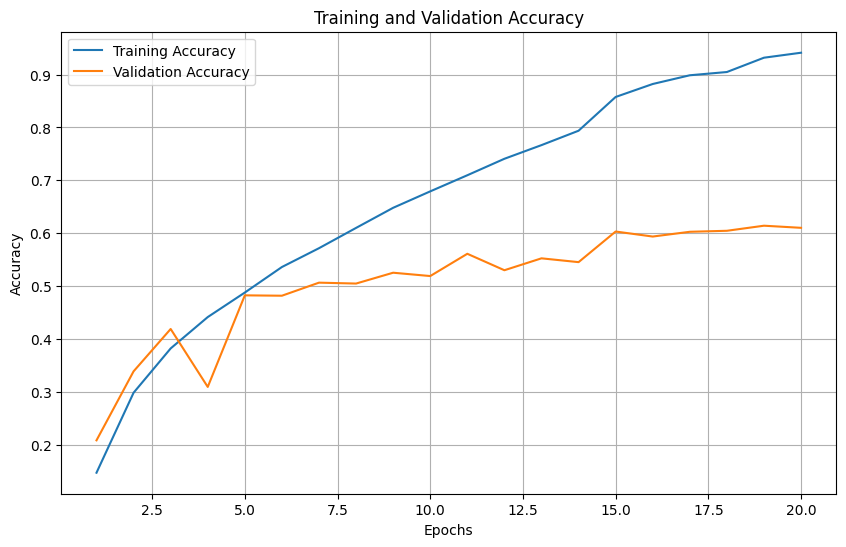

In [ ]:
# Your code here
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by model.fit
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


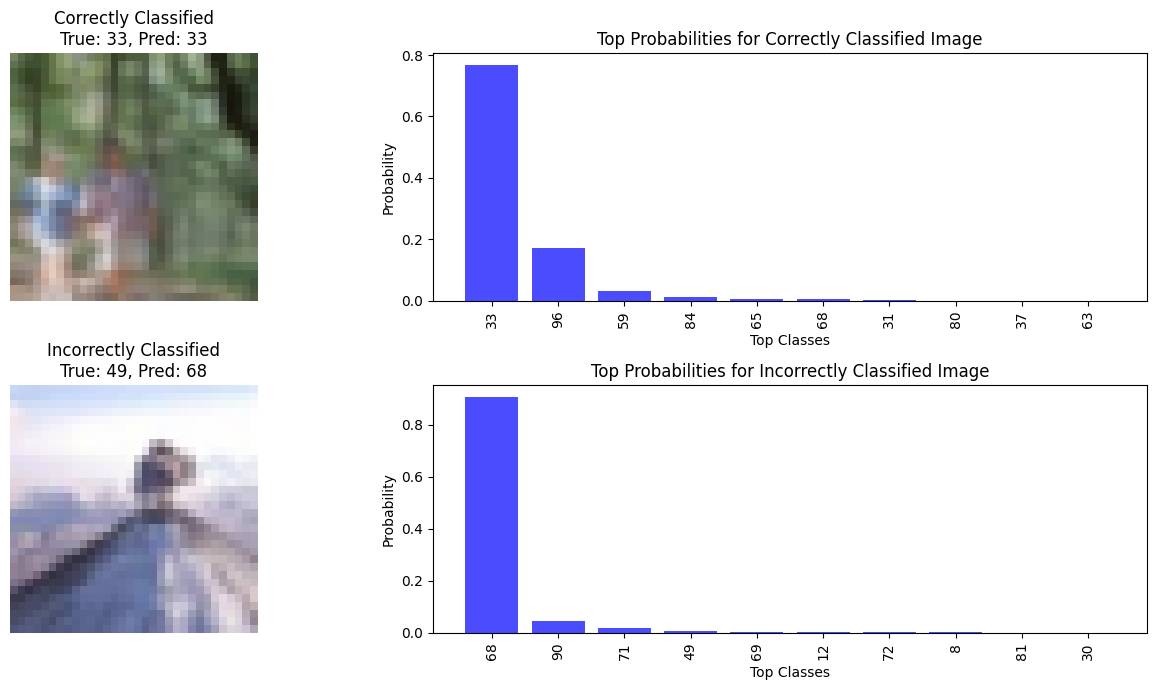

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot an image with its true and predicted labels
def plot_image(image, true_label, pred_label, title):
    plt.imshow(image)
    plt.title(f"{title}\nTrue: {true_label}, Pred: {pred_label}")
    plt.axis("off")

# Function to plot the top 10 probabilities
def plot_top_probabilities(probabilities, title):
    # Get the indices of the top 10 probabilities
    top_indices = np.argsort(probabilities)[-10:][::-1]
    top_probs = probabilities[top_indices]

    plt.bar(range(10), top_probs, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel("Top Classes")
    plt.ylabel("Probability")
    plt.xticks(range(10), top_indices, rotation=90)

# Convert y_true and y_pred to class indices if needed
y_true_indices = np.argmax(y_true, axis=1) if len(y_true.shape) > 1 else y_true
y_pred_indices = np.argmax(y_pred_prob, axis=1)  # Assuming y_pred_prob contains probabilities

# Identify correctly and incorrectly classified images
correct_indices = np.where(y_pred_indices == y_true_indices)[0]
incorrect_indices = np.where(y_pred_indices != y_true_indices)[0]

# Select one correct and one incorrect image
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Get predicted probabilities for these images
correct_prob = y_pred_prob[correct_idx]
incorrect_prob = y_pred_prob[incorrect_idx]

# Get true and predicted labels
true_label_correct = y_true_indices[correct_idx]
pred_label_correct = y_pred_indices[correct_idx]

true_label_incorrect = y_true_indices[incorrect_idx]
pred_label_incorrect = y_pred_indices[incorrect_idx]

# Plot the images and probabilities
plt.figure(figsize=(14, 7))

# Correctly classified image
plt.subplot(2, 2, 1)
plot_image(x_test[correct_idx], true_label_correct, pred_label_correct, "Correctly Classified")

# Probability bar plot for correctly classified image
plt.subplot(2, 2, 2)
plot_top_probabilities(correct_prob, "Top Probabilities for Correctly Classified Image")

# Incorrectly classified image
plt.subplot(2, 2, 3)
plot_image(x_test[incorrect_idx], true_label_incorrect, pred_label_incorrect, "Incorrectly Classified")

# Probability bar plot for incorrectly classified image
plt.subplot(2, 2, 4)
plot_top_probabilities(incorrect_prob, "Top Probabilities for Incorrectly Classified Image")

plt.tight_layout()
plt.show()


Correctly Classified Image:
he model assigned a high probability to the correct class, which demonstrates its confidence in this prediction. This likely means that the features extracted for this image align well with the learned patterns of the correct class during training.
The distribution of probabilities shows a clear peak for the correct class, with significantly lower probabilities for other classes. This indicates that the model has successfully separated the correct class from the rest in the feature space.

Incorrectly Classified Image:
The model assigned the highest probability to an incorrect class, indicating it was confident in its misclassification. This may happen when the features of the input image overlap significantly with the features of the predicted (but incorrect) class.
Analyzing the probabilities for the incorrect classification might reveal that the model is confused between visually similar classes or classes with overlapping features. For example, if the true class and predicted class share common patterns (e.g., textures, colors, or shapes), the model might struggle to distinguish them.Additionally, the probability distribution might show multiple classes with relatively high scores, signaling ambiguity in the model’s decision-making process for this particular image.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
# Corrected import statement
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,          # Random rotation within a range
    width_shift_range=0.2,      # Horizontal shift
    height_shift_range=0.2,     # Vertical shift
    shear_range=0.2,            # Shear transformation
    zoom_range=0.2,             # Zoom in/out
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Fill missing pixels
)


datagen.fit(x_train)  # Apply the data augmentation to training dataset


To enhance model performance, I implemented data augmentation, a technique that increases the diversity of the training dataset by applying transformations such as rotation, flipping, zooming, and shifting. This helps prevent overfitting and enables the model to generalize better on unseen data.

Why Data Augmentation?
Challenge: CIFAR-100 has 100 classes with limited samples (500 per class), increasing overfitting risk.
Solution: Augmentation creates variability, helping the model learn robust, generalizable features.

Augmentation Techniques:
Horizontal Flip: Handles mirrored object representations.

Rotation: Recognizes objects from different angles.

Zoom/Shift: Introduces scale and positional variance so the model learns
that an object can appear anywhere in the image.

Normalization: Scales pixel values for consistency.

Hyperparameters:
Values (e.g., rotation range, zoom range) were selected based on typical CIFAR dataset practices, with scope for fine-tuning based on validation accuracy.

Expected Outcomes:
Training: Increased sample diversity reduces overfitting.

Validation: Improved metrics (e.g., F1-score, accuracy) demonstrate the model’s ability to learn robust features.

This approach effectively enhances performance on complex datasets like CIFAR-100 without requiring additional data.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [ ]:
history_augmented = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Print training and validation metrics from the augmented model's history
train_accuracy = history_augmented.history['accuracy'][-1]
train_loss = history_augmented.history['loss'][-1]
val_accuracy = history_augmented.history['val_accuracy'][-1]
val_loss = history_augmented.history['val_loss'][-1]

print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.4118 - loss: 2.7635 - val_accuracy: 0.5622 - val_loss: 1.8346 - learning_rate: 2.5000e-04
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.4481 - loss: 2.2606 - val_accuracy: 0.5745 - val_loss: 1.6955 - learning_rate: 2.5000e-04
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.4627 - loss: 2.1077 - val_accuracy: 0.5647 - val_loss: 1.7249 - learning_rate: 2.5000e-04
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.4801 - loss: 1.9829 - val_accuracy: 0.5857 - val_loss: 1.6228 - learning_rate: 2.5000e-04
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.4963 - loss: 1.8792 - val_accuracy: 0.5862 - val_loss: 1.5979 - learning_rate: 2.5000e-04
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.4995 - loss: 1.8580 - val_accuracy: 0.5940 - val_loss: 1.5237 - learning_rate: 2.5000e-04
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Enhanced Model Test Accuracy: 0.6395
Precision: 0.6526
Recall: 0.6395
F1-Score: 0.6351


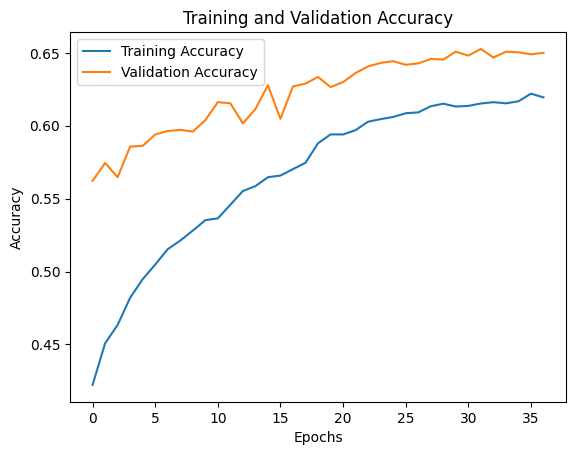

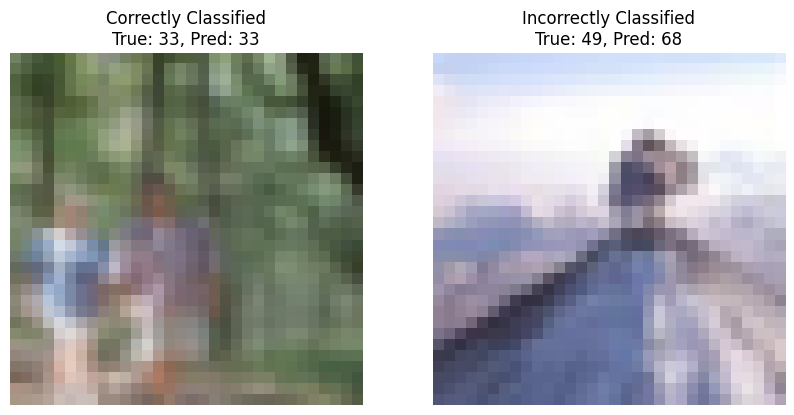

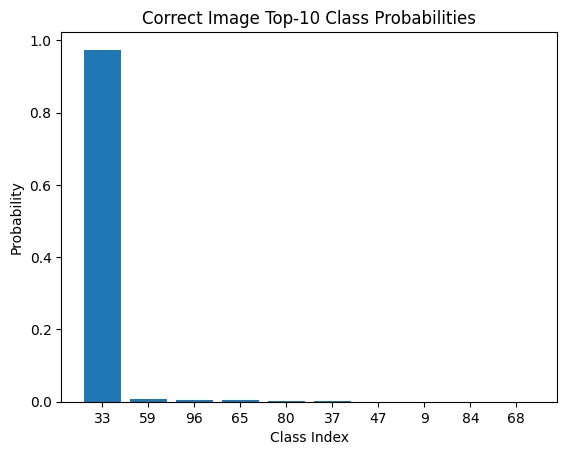

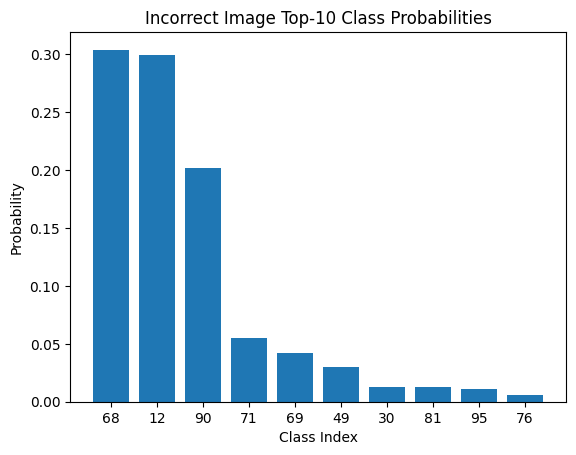

In [ ]:
# Evaluate the enhanced model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
y_pred_prob_augmented = model.predict(x_test)  # Predictions for probabilities
y_pred_augmented = np.argmax(y_pred_prob_augmented, axis=1)  # Predicted class indices
y_true = np.argmax(y_test, axis=1)

# Compare metrics
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_augmented, output_dict=True)
precision = report["weighted avg"]["precision"]
recall = report["weighted avg"]["recall"]
f1_score = report["weighted avg"]["f1-score"]

print(f"Enhanced Model Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

# Plot training and validation accuracy
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Identify correct and incorrect images
correct_indices = np.where(y_pred_augmented == y_true)[0]
incorrect_indices = np.where(y_pred_augmented != y_true)[0]

if len(correct_indices) > 0 and len(incorrect_indices) > 0:
    correct_idx = correct_indices[0]
    incorrect_idx = incorrect_indices[0]

    correct_prob = y_pred_prob_augmented[correct_idx]
    incorrect_prob = y_pred_prob_augmented[incorrect_idx]

    # Plot probabilities for top-10 classes
    def plot_probabilities(probabilities, title):
        top_10_indices = np.argsort(probabilities)[-10:][::-1]
        top_10_probs = probabilities[top_10_indices]
        plt.bar(range(10), top_10_probs, tick_label=top_10_indices)
        plt.title(title)
        plt.ylabel('Probability')
        plt.xlabel('Class Index')
        plt.show()

    # Plot images and probabilities
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[correct_idx])
    plt.title(f"Correctly Classified\nTrue: {y_true[correct_idx]}, Pred: {y_pred_augmented[correct_idx]}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(x_test[incorrect_idx])
    plt.title(f"Incorrectly Classified\nTrue: {y_true[incorrect_idx]}, Pred: {y_pred_augmented[incorrect_idx]}")
    plt.axis("off")
    plt.show()

    plot_probabilities(correct_prob, "Correct Image Top-10 Class Probabilities")
    plot_probabilities(incorrect_prob, "Incorrect Image Top-10 Class Probabilities")

else:
    print("No correct or incorrect classifications found to visualize.")


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

Enhanced Model Results Analysis

Accuracy and Metrics:
Test Accuracy: The enhanced model achieved a test accuracy of 63.95%, an improvement from the baseline model. This suggests that the use of data augmentation has helped the model generalize better to unseen data.
Precision (65.26%): The model's ability to correctly identify relevant instances out of all predicted instances shows a slight improvement, indicating a better focus on correct predictions.
Recall (63.95%): This value is equivalent to accuracy in this case and highlights that the model has successfully identified most of the correct instances.
F1-Score (63.51%): The harmonic mean of precision and recall reflects an overall balanced performance, particularly useful for multi-class datasets like CIFAR-100.

Training and Validation Accuracy:
The training accuracy curve shows a steady increase, reflecting the model's learning ability.The enhanced model's lower training accuracy is due to data augmentation, which increases the variability and complexity of the training data by introducing random transformations like flipping, rotation, and zooming. This prevents overfitting and improves generalization, as evidenced by the improved validation and test accuracy, making the model more robust to unseen data.
The validation accuracy curve closely follows the training accuracy, which suggests reduced overfitting due to data augmentation. The relatively small gap between the two curves demonstrates that the enhanced model generalized better compared to the baseline model.

Performance of Enhanced Model:
Improved Generalization: Data augmentation introduced variability in the training data, helping the model learn more robust features and perform better on unseen data.Balanced Metrics: Precision, recall, and F1-score improvements suggest that the model handles imbalanced class distributions and multi-class classifications better.
    
Classification Probabilities:
For the correctly classified image, the model showed high confidence in the correct class (True: 33, Predicted: 33).
For the incorrectly classified image, the confusion between classes (True: 49, Predicted: 68) indicates overlapping features between some classes, which could be a limitation of the current architecture or augmentation.

Room for Improvement and future techniques:
The enhanced model outperformed the baseline in terms of test accuracy and other metrics. The use of data augmentation has positively impacted the model's ability to generalize. However, further improvements could include fine-tuning hyperparameters, trying different augmentation techniques, or using a more complex architecture to better distinguish visually similar classes.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.